# Plotting CDFs of 1D piecewise-deterministic Markov processes

### Specify example

In [1]:
# example = 1
# example = 2
example = 7

In [2]:
## Settings that are determined by example number 
if (example == 1):
    name = 'Basic'
elif (example == 2):
    name = 'SpeedTest'
elif (example == 7):
    name = 'Fishing'

### Import Packages


In [3]:
## General purpose
import numpy as np
import os

## Plotting-specific
import matplotlib.pyplot as plt
import matplotlib.colors

## Set plotting defaults
mathtextsize = 36
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=28)
plt.rcParams['savefig.bbox'] = 'tight'
colors = ['red', 'blue', 'green']

### Read in data from file

In [4]:
## Location of C++ output
outputfolder = '../output/' + name
fdtype = np.dtype('f8')

## Grid sizes
gridsize = np.fromfile(outputfolder + '_Gridsizes', 'i4')
nx = gridsize[0]
ns = gridsize[1]
n_modes = gridsize[2]

## Step sizes
config = np.fromfile(outputfolder + '_Stepsizes', fdtype)
dx = config[0]
ds = config[1]
xmin = config[2]
xmax = config[3]
smax = config[4]

## Get data from each mode
W        = np.zeros([nx,ns,n_modes])
controls = np.zeros([nx,ns,n_modes])
for j in range(n_modes):
    modename = outputfolder + str(j)
    CDF = np.fromfile(modename + '_CDF', fdtype)
    W[:,:,j] = CDF.reshape([nx,ns])

In [5]:
## Figures will be saved to Ex1/... or Ex2/...
## This code creates this directory if it does not already exist
write_directory = 'Ex' + str(example)
if not os.path.exists(write_directory):
    os.makedirs(write_directory)

# Plotting

### Plot $w_i(x,s)$ for fixed values of $x$

Mode 0: [25th, 50th, 75th] percentile are [4.7217, 4.7217, 4.7217]
Mode 1: [25th, 50th, 75th] percentile are [8.095, 10.49, 14.5633]
Mode 2: [25th, 50th, 75th] percentile are [97.9383, 184.6083, 0.0]
Mode 0: [25th, 50th, 75th] percentile are [26.035, 43.4733, 182.1633]
Mode 1: [25th, 50th, 75th] percentile are [72.7633, 156.8283, 0.0]
Mode 2: [25th, 50th, 75th] percentile are [106.7883, 193.2367, 0.0]


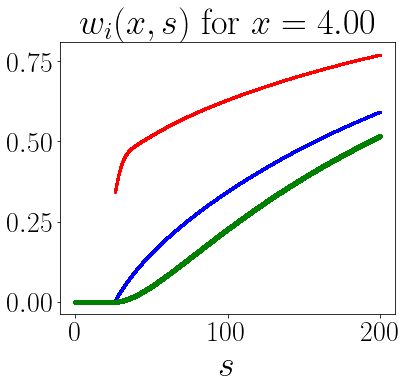

In [6]:
s = np.linspace(0, smax, ns)
V = np.transpose(W, (1, 2, 0))  #[ns][mode][nx]

## Fixed values of x
if (example == 7):
    x0_list = [2.13,4.0]
else:
    x0_list = [0.3,0.7]    
i_list = []
for x0 in x0_list:
    i_list.append(int((x0-xmin)/dx))
n_pts = len(x0_list)
    
for n in range(n_pts):
    i = i_list[n]
    x0 = x0_list[n]
    
    plt.close()
    
    fig, ax = plt.subplots(1,1,figsize = [6,5])
    ax.set_autoscale_on(True)

    if (example == 7):
        for m in range(n_modes):
            d = m/float(n_modes*2)
            ax.plot(s,V[:,m, i],'o', color = colors[m], alpha=1,ms=6*d+1,mec = None, clip_on=False,zorder=100)[0]
            # find percentiles
            a = round(np.argmax(V[:,m,i] > 0.25)*ds,4)
            b = round(np.argmax(V[:,m,i] > 0.5)*ds, 4)
            c = round(np.argmax(V[:,m,i] > 0.75)*ds, 4)
            print(f"Mode {m}: [25th, 50th, 75th] percentile are [{a}, {b}, {c}]")
    else:
        ax.plot(s,V[:,0, i],'bo',alpha=1,markersize=5,clip_on=False,zorder=100)[0]
        ax.plot(s,V[:,1, i],'ro',alpha=1,markersize=2,clip_on=False,zorder=101)[0]
    ax.set_xlabel(r'$s$', fontsize=mathtextsize)
    ax.set_title(r'$w_i(x, s)$ for $x = {:0.2f}$'.format(x0), fontsize=mathtextsize)

    fig.savefig(write_directory + '/' + name + 'CDF' + str(x0).replace('.', '') + '.pdf')
    fig.savefig(write_directory + '/' + name + 'CDF' + str(x0).replace('.', '') + 's' + str(int(smax)) + '.png', dpi = 300)

### Plot $w_i(x,s)$ for fixed $s$-slices

In [ ]:
x = np.linspace(xmin,xmax,nx)
        
## Set key-frames
keyframes = []
if (example == 7):
    for j in [1, 2, 3, 4, 5, 6, 7, 8]:
        keyframes.append(int(j*(ns-1)/10))
else:
    for j in range(1,5):
        keyframes.append(int(j*(ns-1)/8))
n_keyframes = len(keyframes)

## Create figure
plt.close()

fig, ax = plt.subplots(1,1,figsize = [6,5])
if (example == 7):
    ax.set_autoscale_on(True)
    ax.set_ylim([-0.05,1.05])
else:
    ax.set_autoscale_on(False)

## Initial plots
modes = [None]*n_modes
if (example == 7):
    for m in range(n_modes):
        d = m/float(n_modes*2)
        modes[m] = ax.plot(x,W[:,0,m],'o', color = colors[m], alpha=1,ms=6*d+1,mec = None,clip_on=False,zorder=100)[0]
else:
    modes[0] = ax.plot(x,W[:,0,0],'bo',markersize=5,clip_on=False,zorder=100)[0]
    modes[1] = ax.plot(x,W[:,0,1],'ro',markersize=2,clip_on=False,zorder=101)[0]
ax.set_xlabel(r'$x$', fontsize=mathtextsize)
ax.set_title(r'$w_i(x, \bar s)$ for $\bar s = {:0.2f}$'.format(0), fontsize=mathtextsize)

## Draw individual frame
def draw_frame(i):
    s = i * ds
    for m in range(n_modes):
        modes[m].set_ydata(W[:,i,m])
    ax.set_title(r'$w_i(x, \bar s)$ for $\bar s = {:0.2f}$'.format(s), fontsize=mathtextsize)

## Save key-frames
for j in range(n_keyframes):
    draw_frame(keyframes[j])
    fig.savefig(write_directory + '/' + name + str(j) +'.pdf')
    fig.savefig(write_directory + '/' + name + str(j) +'.png', dpi=300)